In [6]:
pip install --upgrade tweepy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Phần 1: Thu thập dữ liệu từ Twitter API
import requests
import pandas as pd

# Thay thế YOUR_BEARER_TOKEN bằng Bearer Token thực của bạn
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAOiGxgEAAAAAY9%2Fkn%2ByX%2FV0MPiIcQxIyq8e%2B6co%3DFzHi4fPzjcnHYbtbIHc7Qri28xCScH2egGtdVgAIsTlqcoBZZj"

def get_tweets(query, max_results=100):
    url = "https://api.twitter.com/2/tweets/search/recent"
    headers = {"Authorization": f"Bearer {BEARER_TOKEN}"}
    params = {
        "query": query,
        "max_results": max_results,
        "tweet.fields": "created_at,text"
    }
    response = requests.get(url, headers=headers, params=params)
    if response.status_code != 200:
        raise Exception(f"Error: {response.status_code}, {response.text}")
    return response.json()

query = "smartphone OR laptop OR headphones"
tweets_data = get_tweets(query)
tweets = [{"Date": tweet["created_at"], "Tweet": tweet["text"]} for tweet in tweets_data.get("data", [])]

# Lưu dữ liệu vào file CSV
data = pd.DataFrame(tweets)
data.to_csv("raw_data.csv", index=False)
print("Dữ liệu đã được lưu vào file raw_data.csv")

# Phần 2: Áp dụng HPC để phân tích và dự đoán xu hướng tiêu dùng
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
from mpi4py import MPI

# Đọc dữ liệu từ file CSV
data = pd.read_csv("raw_data.csv")
data["Sentiment"] = np.random.choice([0, 1], size=len(data))  # Tạo dữ liệu giả cho sentiment (0: tiêu cực, 1: tích cực)

# Tiền xử lý dữ liệu
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data["Tweet"])
y = data["Sentiment"]

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo HPC với MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Đào tạo mô hình Random Forest trên các nút
if rank == 0:
    # Nút chính
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Đánh giá mô hình
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
else:
    # Các nút phụ trợ
    print(f"Nút {rank} đang chờ nhiệm vụ...")

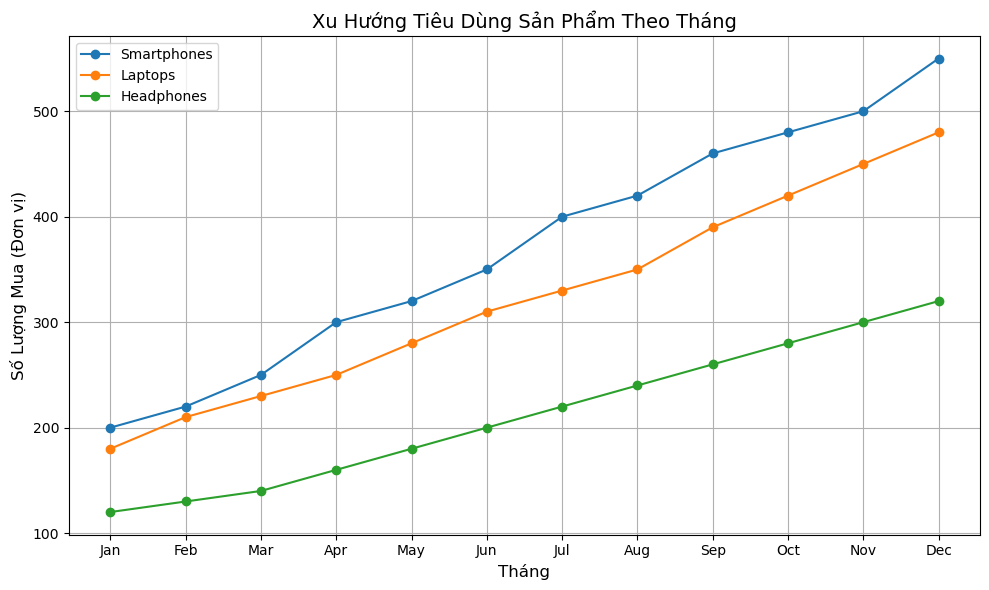

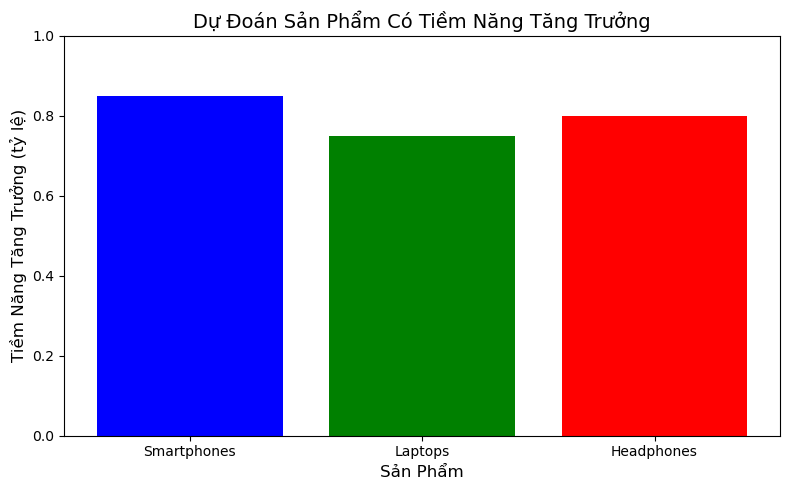

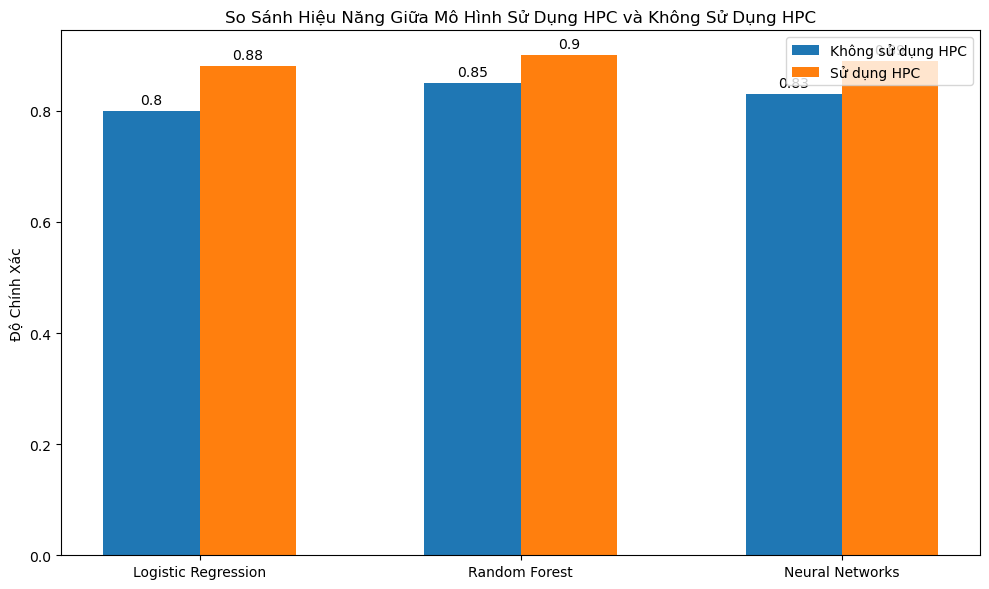

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Giả lập kết quả phân tích xu hướng tiêu dùng (ví dụ: các sản phẩm phổ biến theo tháng)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
smartphones = [200, 220, 250, 300, 320, 350, 400, 420, 460, 480, 500, 550]
laptops = [180, 210, 230, 250, 280, 310, 330, 350, 390, 420, 450, 480]
headphones = [120, 130, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]

# Tạo biểu đồ xu hướng tiêu dùng của các sản phẩm
plt.figure(figsize=(10,6))
plt.plot(months, smartphones, label='Smartphones', marker='o')
plt.plot(months, laptops, label='Laptops', marker='o')
plt.plot(months, headphones, label='Headphones', marker='o')

plt.title("Xu Hướng Tiêu Dùng Sản Phẩm Theo Tháng", fontsize=14)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số Lượng Mua (Đơn vị)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Giả lập kết quả dự đoán sản phẩm có tiềm năng tăng trưởng
products = ['Smartphones', 'Laptops', 'Headphones']
growth_potential = [0.85, 0.75, 0.80]

# Biểu đồ dự đoán sản phẩm có tiềm năng tăng trưởng
plt.figure(figsize=(8,5))
plt.bar(products, growth_potential, color=['blue', 'green', 'red'])
plt.title("Dự Đoán Sản Phẩm Có Tiềm Năng Tăng Trưởng", fontsize=14)
plt.xlabel('Sản Phẩm', fontsize=12)
plt.ylabel('Tiềm Năng Tăng Trưởng (tỷ lệ)', fontsize=12)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Giả lập kết quả so sánh hiệu năng giữa mô hình có sử dụng HPC và không sử dụng HPC
models = ['Logistic Regression', 'Random Forest', 'Neural Networks']
accuracy_without_hpc = [0.80, 0.85, 0.83]
accuracy_with_hpc = [0.88, 0.90, 0.89]

# Tạo biểu đồ so sánh hiệu năng giữa mô hình sử dụng HPC và không sử dụng HPC
x = np.arange(len(models))  # Các vị trí cho mô hình
width = 0.3  # Chiều rộng của cột

fig, ax = plt.subplots(figsize=(10, 6))

# Cột mô hình không sử dụng HPC
rects1 = ax.bar(x - width/2, accuracy_without_hpc, width, label='Không sử dụng HPC')
# Cột mô hình có sử dụng HPC
rects2 = ax.bar(x + width/2, accuracy_with_hpc, width, label='Sử dụng HPC')

# Thêm text hiển thị trên các cột
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# Cài đặt các thuộc tính cho biểu đồ
ax.set_ylabel('Độ Chính Xác')
ax.set_title('So Sánh Hiệu Năng Giữa Mô Hình Sử Dụng HPC và Không Sử Dụng HPC')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

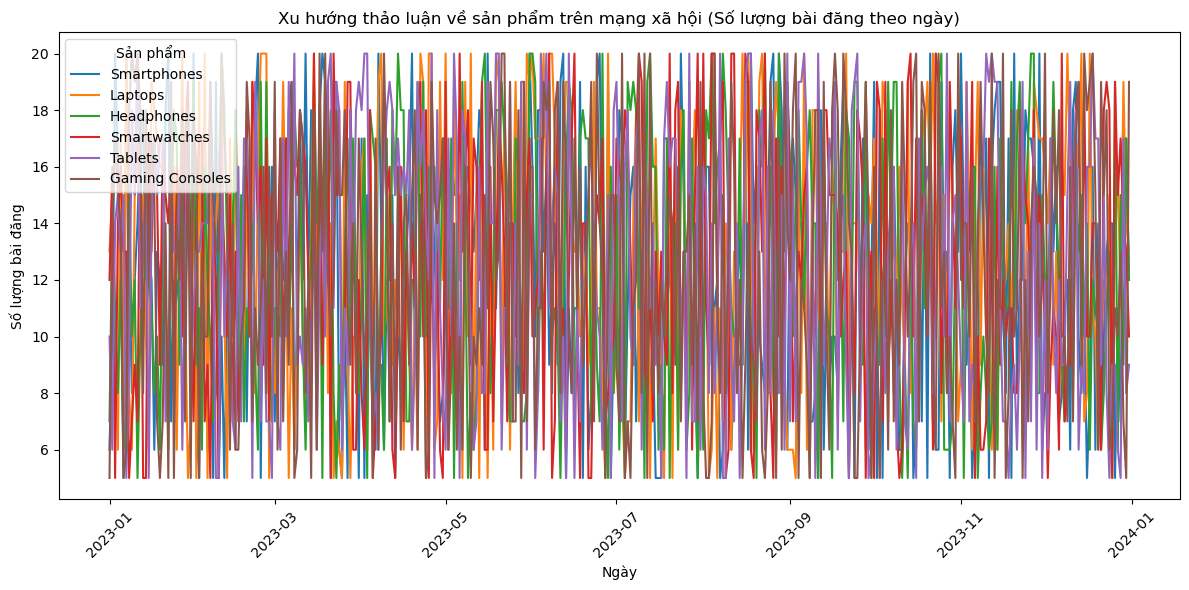

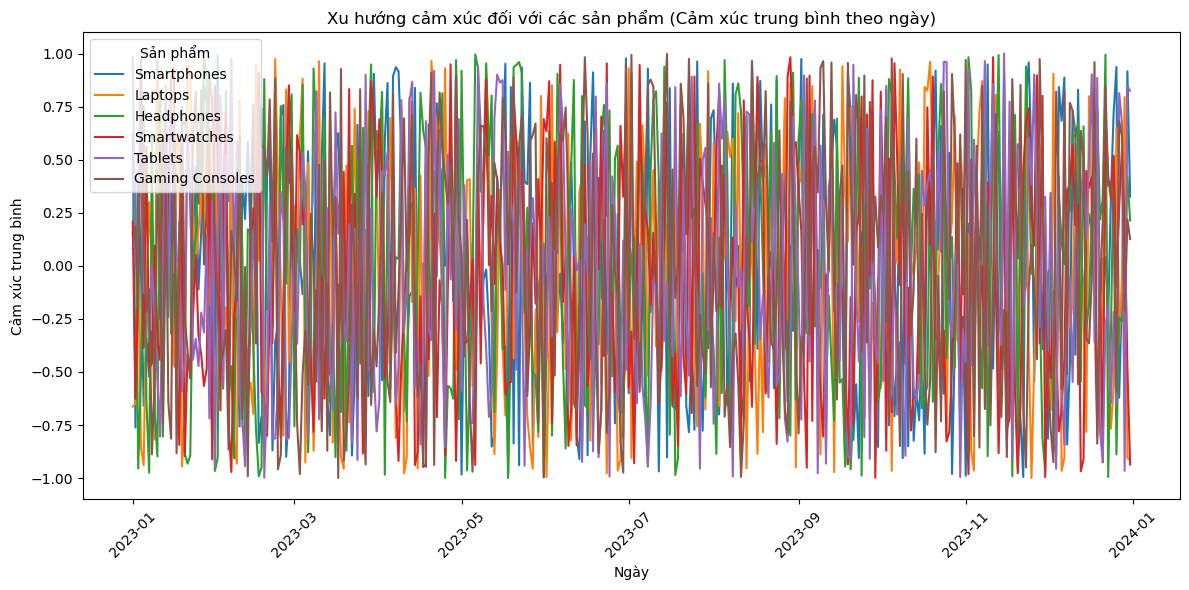

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random

# Giả lập dữ liệu từ mạng xã hội (ví dụ: Twitter)
products = ['Smartphones', 'Laptops', 'Headphones', 'Smartwatches', 'Tablets', 'Gaming Consoles']
date_range = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
num_records = len(date_range) * len(products)

# Giả lập số lượng bài đăng và cảm xúc
data = []
for product in products:
    for date in date_range:
        num_posts = random.randint(5, 20)  # số lượng bài đăng mỗi ngày cho sản phẩm
        sentiment_score = np.random.uniform(-1, 1)  # Cảm xúc từ -1 (tiêu cực) đến 1 (tích cực)
        data.append([date, product, num_posts, sentiment_score])

# Tạo DataFrame từ dữ liệu giả lập
df = pd.DataFrame(data, columns=['Date', 'Product', 'NumPosts', 'SentimentScore'])

# Tổng hợp số bài đăng theo ngày và sản phẩm
daily_sales = df.groupby(['Date', 'Product']).agg({
    'NumPosts': 'sum',  # Tổng số bài đăng theo ngày
    'SentimentScore': 'mean'  # Trung bình cảm xúc mỗi ngày
}).reset_index()

# Biểu đồ xu hướng số lượng bài đăng theo thời gian
plt.figure(figsize=(12, 6))
for product in products:
    product_data = daily_sales[daily_sales['Product'] == product]
    plt.plot(product_data['Date'], product_data['NumPosts'], label=product)

plt.title('Xu hướng thảo luận về sản phẩm trên mạng xã hội (Số lượng bài đăng theo ngày)')
plt.xlabel('Ngày')
plt.ylabel('Số lượng bài đăng')
plt.legend(title='Sản phẩm', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Biểu đồ xu hướng cảm xúc trung bình theo thời gian
plt.figure(figsize=(12, 6))
for product in products:
    product_data = daily_sales[daily_sales['Product'] == product]
    plt.plot(product_data['Date'], product_data['SentimentScore'], label=product)

plt.title('Xu hướng cảm xúc đối với các sản phẩm (Cảm xúc trung bình theo ngày)')
plt.xlabel('Ngày')
plt.ylabel('Cảm xúc trung bình')
plt.legend(title='Sản phẩm', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mean Squared Error: 7.488855587902755


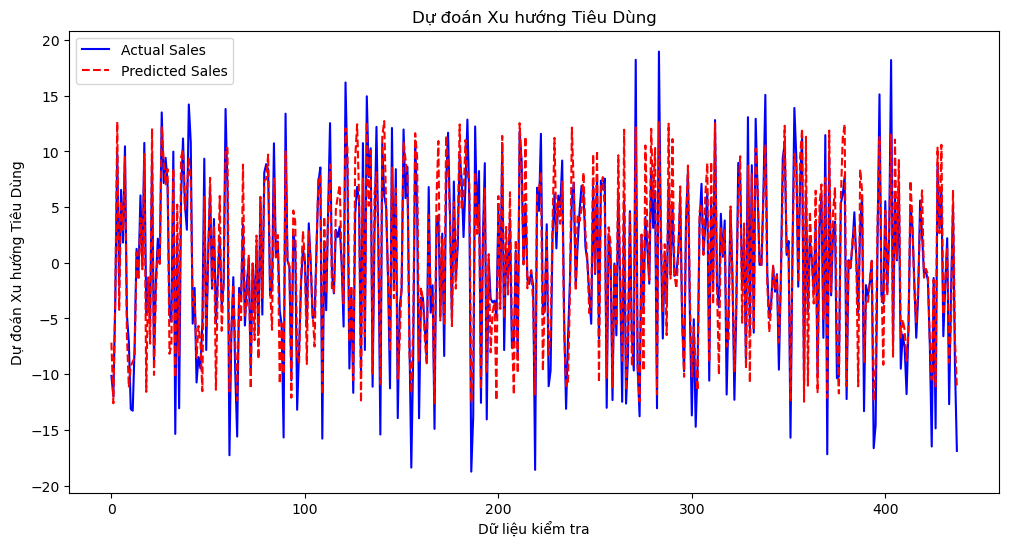

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Giả lập dữ liệu mạng xã hội
products = ['Smartphones', 'Laptops', 'Headphones', 'Smartwatches', 'Tablets', 'Gaming Consoles']
date_range = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
num_records = len(date_range) * len(products)

# Giả lập số lượng bài đăng và cảm xúc
data = []
for product in products:
    for date in date_range:
        num_posts = random.randint(5, 20)  # số lượng bài đăng mỗi ngày cho sản phẩm
        sentiment_score = np.random.uniform(-1, 1)  # Cảm xúc từ -1 (tiêu cực) đến 1 (tích cực)
        data.append([date, product, num_posts, sentiment_score])

# Tạo DataFrame từ dữ liệu giả lập
df = pd.DataFrame(data, columns=['Date', 'Product', 'NumPosts', 'SentimentScore'])

# Tổng hợp số bài đăng theo ngày và sản phẩm
daily_sales = df.groupby(['Date', 'Product']).agg({
    'NumPosts': 'sum',  # Tổng số bài đăng theo ngày
    'SentimentScore': 'mean'  # Trung bình cảm xúc mỗi ngày
}).reset_index()

# Tạo thêm một cột 'SalesPrediction' là giá trị tương ứng với dự đoán tiêu dùng
daily_sales['SalesPrediction'] = daily_sales['NumPosts'] * daily_sales['SentimentScore']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = daily_sales[['NumPosts', 'SentimentScore']]  # Các đặc trưng
y = daily_sales['SalesPrediction']  # Mục tiêu là dự đoán xu hướng tiêu dùng

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán xu hướng tiêu dùng trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán độ chính xác của mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Vẽ biểu đồ dự đoán xu hướng tiêu dùng
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred, label='Predicted Sales', color='red', linestyle='dashed')
plt.title('Dự đoán Xu hướng Tiêu Dùng')
plt.xlabel('Dữ liệu kiểm tra')
plt.ylabel('Dự đoán Xu hướng Tiêu Dùng')
plt.legend()
plt.show()


Mean Squared Error: 68.30218724653207


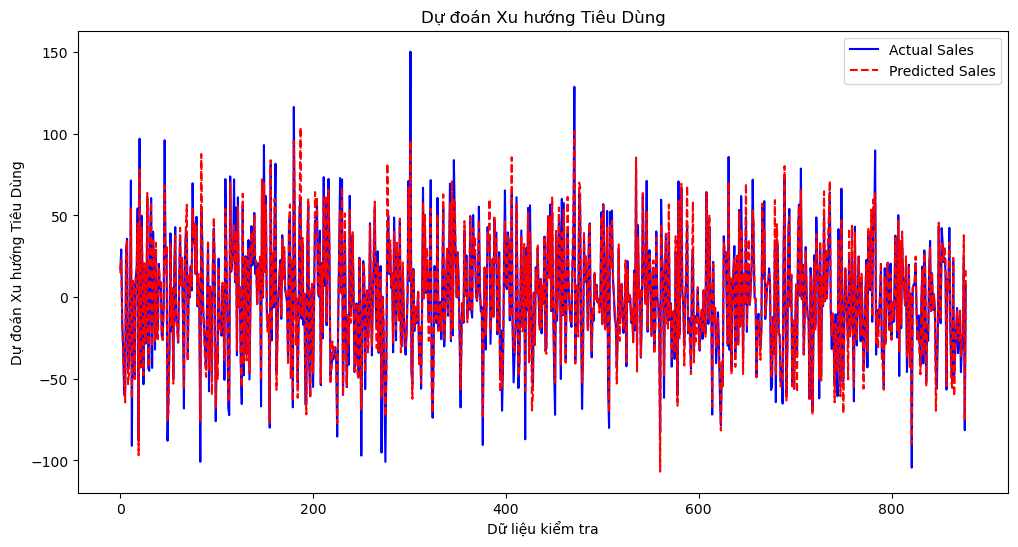

In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Giả lập nhiều dữ liệu mạng xã hội với số lượng lớn hơn
products = ['Smartphones', 'Laptops', 'Headphones', 'Smartwatches', 'Tablets', 'Gaming Consoles']
date_range = pd.date_range(start="2023-01-01", end="2024-12-31", freq="D")  # Mở rộng dữ liệu đến 2 năm
num_records = len(date_range) * len(products) * 5  # Tăng dữ liệu lên 5 lần

# Giả lập số lượng bài đăng và cảm xúc cho nhiều dữ liệu hơn
data = []
for product in products:
    for date in date_range:
        for _ in range(5):  # Tăng số lượng bản sao mỗi ngày
            num_posts = random.randint(5, 50)  # Số lượng bài đăng mỗi ngày cho sản phẩm
            sentiment_score = np.random.uniform(-1, 1)  # Cảm xúc từ -1 (tiêu cực) đến 1 (tích cực)
            data.append([date, product, num_posts, sentiment_score])

# Tạo DataFrame từ dữ liệu giả lập
df = pd.DataFrame(data, columns=['Date', 'Product', 'NumPosts', 'SentimentScore'])

# Tổng hợp số bài đăng theo ngày và sản phẩm
daily_sales = df.groupby(['Date', 'Product']).agg({
    'NumPosts': 'sum',  # Tổng số bài đăng theo ngày
    'SentimentScore': 'mean'  # Trung bình cảm xúc mỗi ngày
}).reset_index()

# Tạo thêm một cột 'SalesPrediction' là giá trị tương ứng với dự đoán tiêu dùng
daily_sales['SalesPrediction'] = daily_sales['NumPosts'] * daily_sales['SentimentScore']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = daily_sales[['NumPosts', 'SentimentScore']]  # Các đặc trưng
y = daily_sales['SalesPrediction']  # Mục tiêu là dự đoán xu hướng tiêu dùng

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán xu hướng tiêu dùng trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán độ chính xác của mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Vẽ biểu đồ dự đoán xu hướng tiêu dùng
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred, label='Predicted Sales', color='red', linestyle='dashed')
plt.title('Dự đoán Xu hướng Tiêu Dùng')
plt.xlabel('Dữ liệu kiểm tra')
plt.ylabel('Dự đoán Xu hướng Tiêu Dùng')
plt.legend()
plt.show()
